In [1]:
import mysql.connector
import mysql.connector as mariadb

def get_db_connection():
    con = mariadb.connect(host='localhost', port= 3307,user="root",password="2011",database="creditcard_capstone")
    return con

In [2]:
import numpy as np
import matplotlib.pyplot as plt

[('Gas', 336059.26), ('Grocery', 337051.63), ('Education', 337980.07), ('Entertainment', 338950.1), ('Healthcare', 340476.2), ('Test', 341310.37), ('Bills', 351405.28)]
type =  ['Gas', 'Grocery', 'Education', 'Entertainment', 'Healthcare', 'Test', 'Bills']
value =  [336059.26, 337051.63, 337980.07, 338950.1, 340476.2, 341310.37, 351405.28]


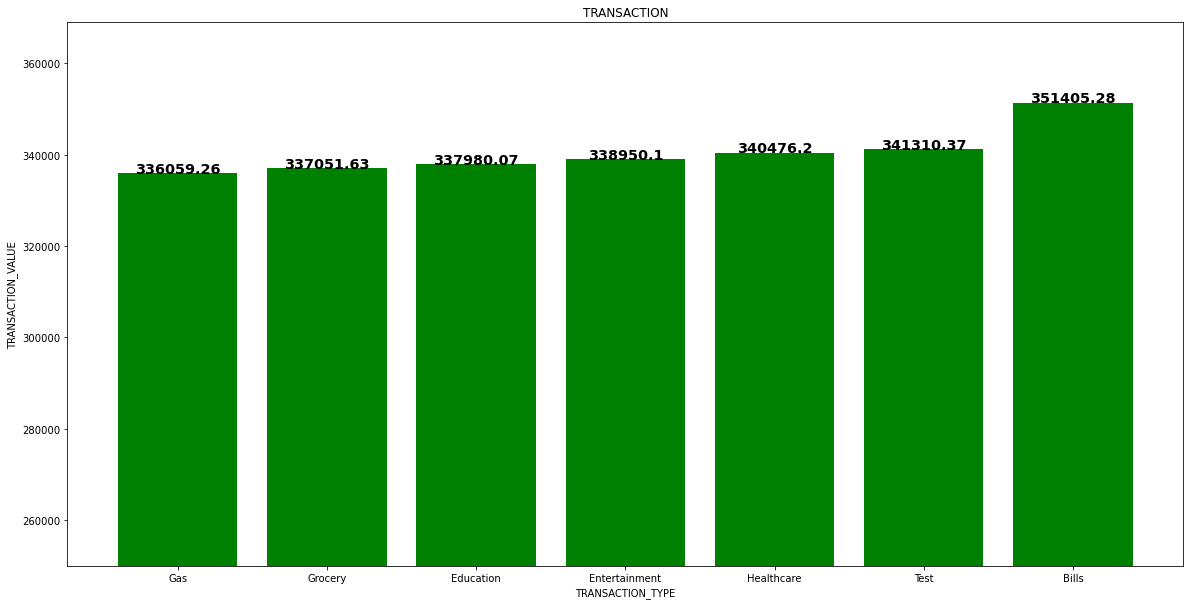

In [7]:
#3.1. Find and plot which transaction type has a high rate of transactions.

sql = """SELECT TRANSACTION_TYPE, ROUND(sum(TRANSACTION_VALUE),2) from cdw_sapp_credit_card1 group by TRANSACTION_TYPE 
       order by sum(TRANSACTION_VALUE)""" 

db_con = get_db_connection()
cursor = db_con.cursor()
cursor.execute(sql)
result = cursor.fetchall()
print(result)

t_type = []
t_value = []
 
for i in result:
    t_type.append(i[0])
    t_value.append(i[1])
     
print("type = ", t_type)
print("value = ", t_value)
 

plt.figure(figsize=(20, 10))

plt.bar(t_type, t_value, color = "green")

for i in range(len(t_type)):
    plt.text(i, t_value[i], t_value[i], ha = 'center', color = 'black', fontweight = 'bold', size = 'x-large')
plt.ylim(250000)    
plt.xlabel("TRANSACTION_TYPE")
plt.ylabel("TRANSACTION_VALUE")
plt.title("TRANSACTION")
plt.show()


Based on the above graph, Bills has the highest transaction value.

[('Grocery', 6549), ('Gas', 6605), ('Entertainment', 6635), ('Education', 6638), ('Test', 6683), ('Healthcare', 6723), ('Bills', 6861)]
type =  ['Grocery', 'Gas', 'Entertainment', 'Education', 'Test', 'Healthcare', 'Bills']
count per type =  [6549, 6605, 6635, 6638, 6683, 6723, 6861]


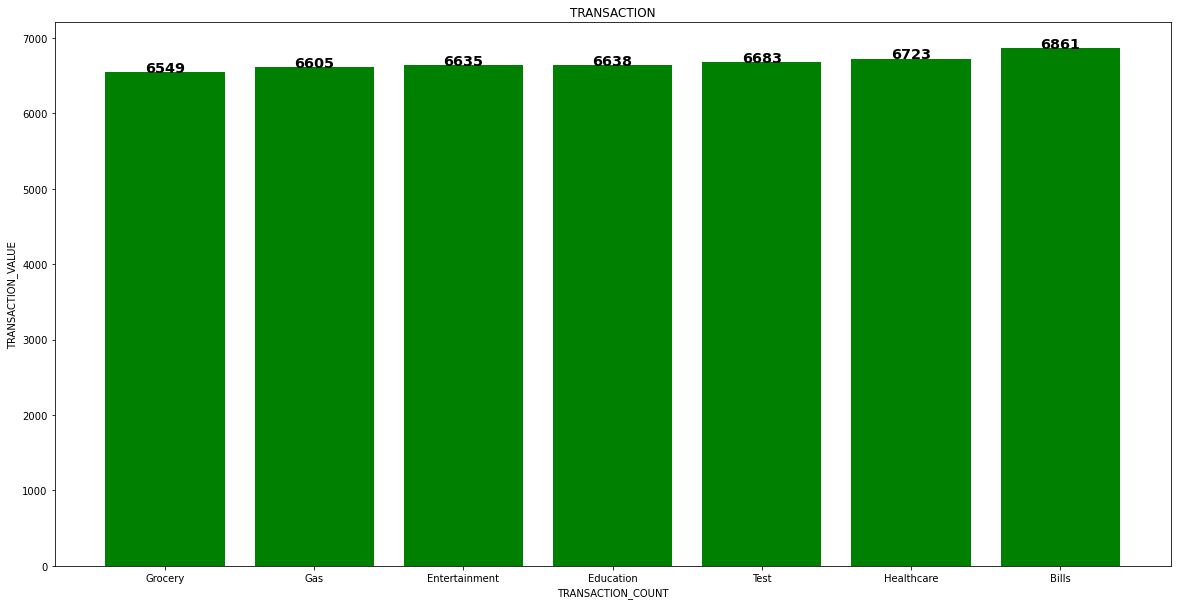

In [8]:
#Find and plot transactions, showing which transaction type occurs most often.

sql = """SELECT TRANSACTION_TYPE, count(TRANSACTION_VALUE) from cdw_sapp_credit_card1 group by TRANSACTION_TYPE 
        order by count(TRANSACTION_VALUE)""" 
        

db_con = get_db_connection()
cursor = db_con.cursor()
cursor.execute(sql)
result = cursor.fetchall()
print(result)

t_type = []
t_count = []
 
for i in result:
    t_type.append(i[0])
    t_count.append(i[1])
     
print("type = ", t_type)
print("count per type = ", t_count)
 

plt.figure(figsize=(20, 10))

plt.bar(t_type, t_count, color = "green")

for i in range(len(t_type)):
    plt.text(i, t_count[i], t_count[i], ha = 'center', color = 'black', fontweight = 'bold', size = 'x-large')
    
plt.xlabel("TRANSACTION_COUNT")
plt.ylabel("TRANSACTION_VALUE")
plt.title("TRANSACTION")
plt.show()

[(5, 'AR'), (5, 'AL'), (9, 'MT'), (13, 'IN'), (14, 'CT'), (16, 'WA'), (17, 'KY'), (21, 'IA'), (24, 'MS'), (28, 'MN'), (29, 'WI'), (30, 'SC'), (33, 'TX'), (33, 'MA'), (37, 'NC'), (39, 'VA'), (44, 'OH'), (44, 'MI'), (45, 'CA'), (50, 'MD'), (53, 'NJ'), (58, 'IL'), (64, 'FL'), (72, 'PA'), (73, 'GA'), (96, 'NY')]
total number of customers =  [5, 5, 9, 13, 14, 16, 17, 21, 24, 28, 29, 30, 33, 33, 37, 39, 44, 44, 45, 50, 53, 58, 64, 72, 73, 96]
state =  ['AR', 'AL', 'MT', 'IN', 'CT', 'WA', 'KY', 'IA', 'MS', 'MN', 'WI', 'SC', 'TX', 'MA', 'NC', 'VA', 'OH', 'MI', 'CA', 'MD', 'NJ', 'IL', 'FL', 'PA', 'GA', 'NY']


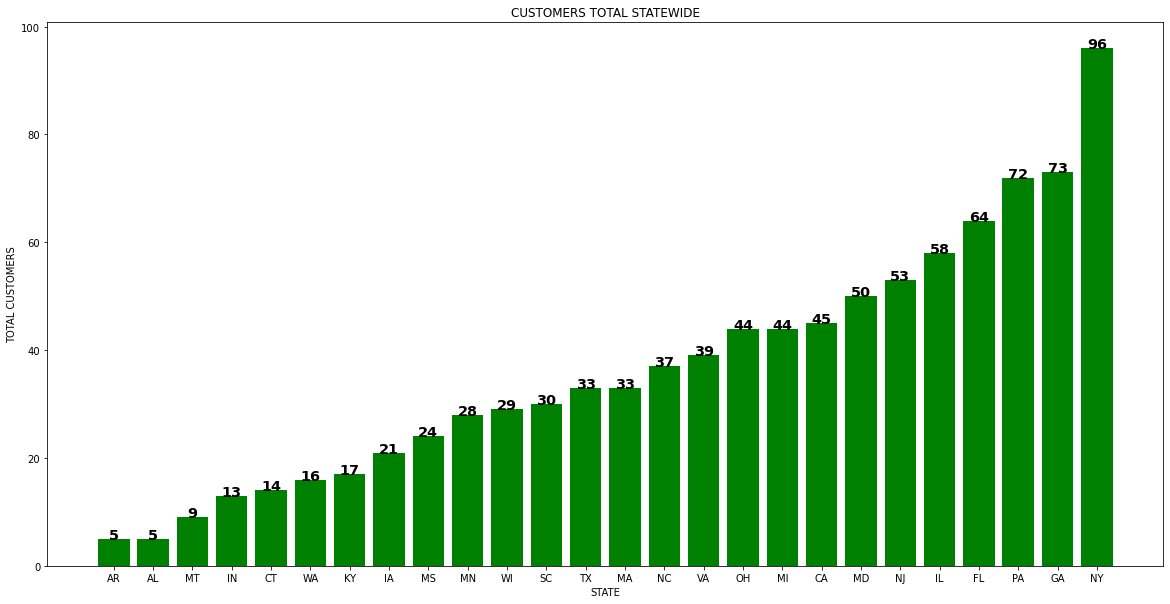

In [30]:
#3.2.Find and plot which state has a high number of customers

sql = "SELECT count(SSN), CUST_STATE from cdw_sapp_customer group by CUST_STATE order by count(SSN)" 

db_con = get_db_connection()
cursor = db_con.cursor()
cursor.execute(sql)
result = cursor.fetchall()
print(result)

total = []
state = []
 
for i in result:
    total.append(i[0])
    state.append(i[1])
     
print("total number of customers = ", total)
print("state = ", state)
 

plt.bar(state, total, color = "green")

for i in range(len(state)):
    plt.text(i, total[i], total[i], ha = 'center', color = 'black', fontweight = 'bold', size = 'x-large')
#plt.ylim(250000)    
plt.xlabel("STATE")
plt.ylabel("TOTAL CUSTOMERS")
plt.title("CUSTOMERS TOTAL STATEWIDE")
plt.show()

[('Ty', 5633.07), ('Jessie', 5548.14), ('Phoebe', 5476.08), ('Thurman', 5314.97), ('Bret', 5261.03), ('Joesph', 5241.18), ('Aurelia', 5223.96), ('Marcelo', 5203.08), ('Alexis', 5149.75), ('Christina', 5133.29), ('Whitney', 5062.33), ('Bud', 5046.07), ('Carrol', 5023.65), ('Lorrie', 5014.01), ('Liliana', 5012.81), ('Pam', 5008.23), ('Bertha', 5008.09), ('Adele', 5006.73), ('Rod', 4995.1), ('Angie', 4986.13), ('Chelsea', 4981.72), ('Julie', 4977.31), ('Virgil', 4964.48), ('Warren', 4947.91), ('Meghan', 4946.37), ('Blair', 4942.5), ('Velma', 4931.57), ('Susan', 4917.59), ('Mayra', 4913.28), ('Orval', 4911.13), ('Bo', 4911.11), ('Joanna', 4907.6), ('Cole', 4904.29), ('Bernadine', 4898.83), ('Kay', 4893.27), ('Alyssa', 4887.92), ('Kristopher', 4882.52), ('Tabitha', 4880.13), ('Esperanza', 4873.51), ('Julius', 4871.28), ('Joaquin', 4839.42), ('Maria', 4835.41), ('Darrel', 4822.37), ('Will', 4816.52), ('Marguerite', 4809.21), ('Dominique', 4808.39), ('Karen', 4806.63), ('Maurice', 4803.44), (

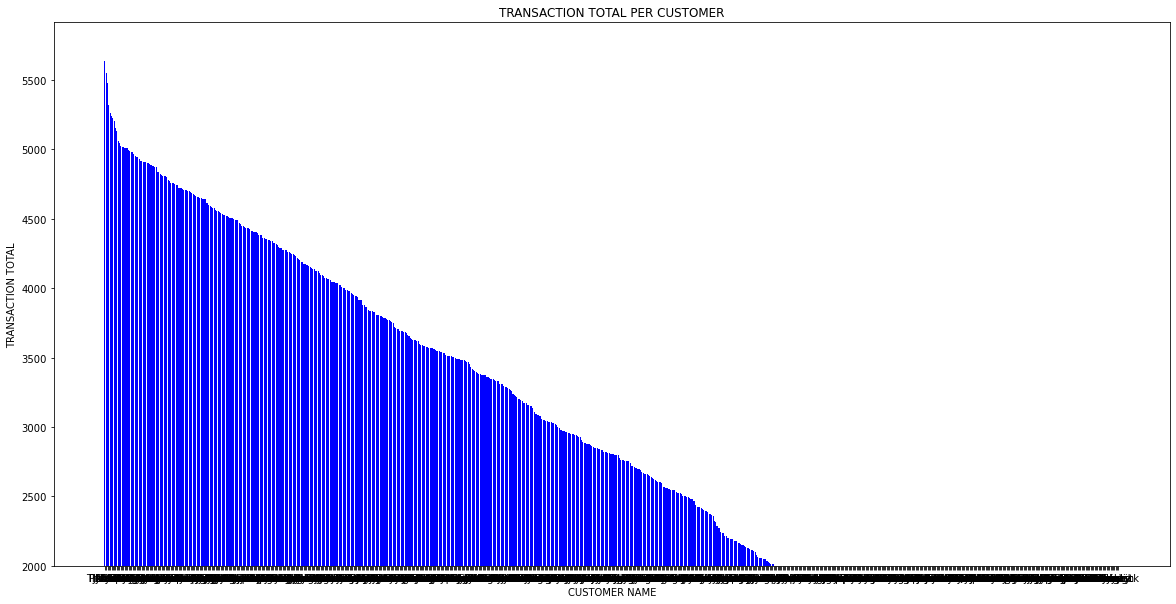

In [9]:
#3.3. Find and plot the sum of all transactions for each customer, and which customer has the highest transaction amount.
#hint(use CUST_SSN)

sql = """SELECT FIRST_NAME, round(sum(TRANSACTION_VALUE),2) from cdw_sapp_customer c, cdw_sapp_credit_card1 cc where c.SSN=cc.CUST_SSN 
         group by CUST_SSN order by sum(TRANSACTION_VALUE) desc""" 

db_con = get_db_connection()
cursor = db_con.cursor()
cursor.execute(sql)
result = cursor.fetchall()
print(result)

f_name = []
value = []
 
for i in result:
    f_name.append(i[0])
    value.append(i[1])
     
print("customers first name = ", f_name)
print("value = ", value)
 

plt.figure(figsize=(20, 10))

plt.bar(f_name, value, color = "blue")

#for i in range(len(f_name)):
  #  plt.text(i, f_name[i], f_name[i], ha = 'center', color = 'black', fontweight = 'bold', size = 'x-large')
plt.ylim(2000)    
plt.xlabel("CUSTOMER NAME")
plt.ylabel("TRANSACTION TOTAL")
plt.title("TRANSACTION TOTAL PER CUSTOMER")
plt.show()

[('201802', 3959), ('201810', 3946), ('201805', 3946)]
Month =  ['201802', '201810', '201805']
count =  [3959, 3946, 3946]


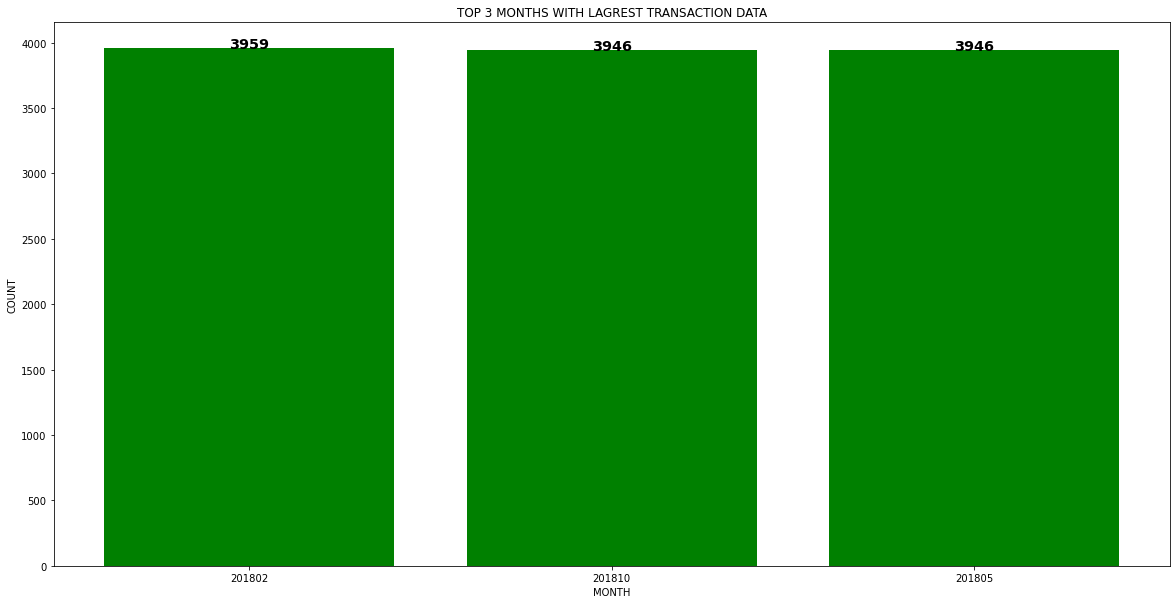

In [13]:
#3.4. Find and plot the top three months with the largest transaction data.

sql = """SELECT substr(TIMEID, 1,6), COUNT(TRANSACTION_VALUE) from cdw_sapp_credit_card1
        GROUP BY substr(TIMEID, 1,6) ORDER BY COUNT(TRANSACTION_VALUE) desc LIMIT 3"""

 
db_con = get_db_connection()
cursor = db_con.cursor()
cursor.execute(sql)
result = cursor.fetchall()
print(result)

month = []
count = []
 
for i in result:
    month.append(i[0])
    count.append(i[1])
     
print("Month = ", month)
print("count = ", count)
 

plt.figure(figsize=(20, 10))

plt.bar(month, count, color = "GREEN")

for i in range(len(month)):
    plt.text(i, count[i], count[i], ha = 'center', color = 'black', fontweight = 'bold', size = 'x-large')
    
plt.xlabel("MONTH")
plt.ylabel("COUNT")
plt.title("TOP 3 MONTHS WITH LAGREST TRANSACTION DATA")
plt.show()

[('Example Bank', 340476.2)]
Branch Name =  ['Example Bank']
value =  [340476.2]


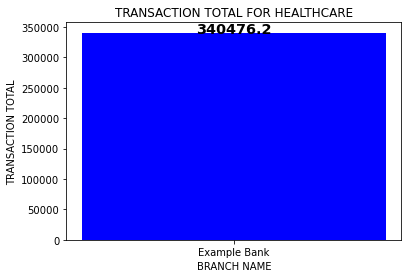

In [10]:
#3.5.Find and plot which branch processed the highest total dollar value of healthcare transactions



sql = """SELECT BRANCH_NAME, round(sum(TRANSACTION_VALUE),2) from cdw_sapp_branch b, cdw_sapp_credit_card1 cc where
     b.BRANCH_CODE=cc.BRANCH_CODE and TRANSACTION_TYPE='Healthcare' group by BRANCH_NAME""" 

db_con = get_db_connection()
cursor = db_con.cursor()
cursor.execute(sql)
result = cursor.fetchall()
print(result)

b_name = []
value = []
 
for i in result:
    b_name.append(i[0])
    value.append(i[1])
     
print("Branch Name = ", b_name)
print("value = ", value)
 
 
# Visulizing Data using Matplotlib

plt.bar(b_name, value, color = "blue")

for i in range(len(b_name)):
    plt.text(i, value[i], value[i], ha = 'center', color = 'black', fontweight = 'bold', size = 'x-large')
    
plt.xlabel("BRANCH NAME")
plt.ylabel("TRANSACTION TOTAL")
plt.title("TRANSACTION TOTAL FOR HEALTHCARE")
plt.show()